**Loading the dataset**

In [1]:
import time
import numpy as np
import pandas as pd

df = pd.read_csv("synthetic_2D.txt", delimiter=" ", header=None)

**Displaying the basic information of the dataset**

In [2]:
display(df.head())
display(df.info())
display(df.describe())

,0,1,2
0,5.94,8.54,0
1,3.60,10.52,0
2,4.32,11.34,0
3,5.37,12.05,0
4,3.98,7.44,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
0    500 non-null float64
1    500 non-null float64
2    500 non-null int64
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


None

,0,1,2
count,500.000000,500.000000,500.000000
mean,7.320260,11.792560,0.900000
std,2.563436,2.929016,0.831494
min,2.680000,4.180000,0.000000
25%,5.237500,9.647500,0.000000
50%,7.105000,11.450000,1.000000
75%,8.972500,13.817500,2.000000
max,15.400000,20.300000,2.000000


**Seperating the features and labels**

In [3]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

**Displaying the actual clusters**

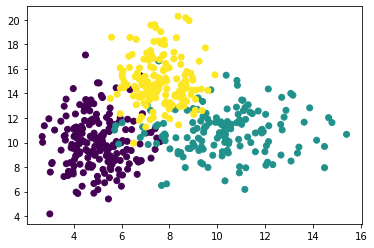

In [4]:
import matplotlib.pyplot as plt
plt.scatter(X.iloc[:,0], X.iloc[:,1], c = y)

**Initializing the centroids and clusters points values**

In [5]:
class KMeans:

    def __init__(self, n_clusters):
        self.data = pd.DataFrame()
        self.n_clusters = n_clusters
        self.centroids = pd.DataFrame()
        self.clusters = np.ndarray(1)
        self.old_centroids = pd.DataFrame()
        self.verbose = True
        self.predictions = list()

    def train(self, df, verbose):
        self.verbose = verbose
        self.data = df.copy(deep=True)
        self.clusters = np.zeros(len(self.data))

        unique_rows = self.data.drop_duplicates()
        unique_rows.reset_index(drop=True, inplace=True)
        self.centroids = unique_rows.sample(n=self.n_clusters, random_state=2)
        self.centroids.reset_index(drop=True, inplace=True)

        if self.verbose:
            print("\nRandomly initiated centroids:")
            print(self.centroids)

        # Initialize old centroids as a matrix of all 0's
        self.old_centroids = pd.DataFrame(np.zeros(shape=(self.n_clusters, self.data.shape[1])),
                                          columns=self.data.columns)

        # Compare every data point in our dataset to each of the k-means and assign each point to closest cluster
        while not self.old_centroids.equals(self.centroids):
            
            if self.verbose:
                time.sleep(3)

            # Stash old centroids
            self.old_centroids = self.centroids.copy(deep=True)

            # Iterate through each data point in the matrix
            for row_i in range(0, len(self.data)):
                distances = list()
                point = self.data.iloc[row_i]

                # Calculate the distance between the current point and each of the centroids
                for row_c in range(0, len(self.centroids)):
                    centroid = self.centroids.iloc[row_c]
                    distances.append(np.linalg.norm(point - centroid))

                # Assign this data point to a cluster
                self.clusters[row_i] = np.argmin(distances)

            # For each cluster extract the values which now belong to each cluster and calculate new k-means
            for cls in range(0, self.n_clusters):

                cls_idx = np.where(self.clusters == cls)[0]

                if len(cls_idx) == 0:
                    self.centroids.loc[cls] = self.old_centroids.loc[cls]
                else:
                    # Set the new k-mean to the mean value of the data points within this cluster
                    self.centroids.loc[cls] = self.data.iloc[cls_idx].mean()
                    
                if self.verbose:
                    print("\nRow indices belonging to cluster {}: [n={}]".format(cls, len(cls_idx)))
                    print(cls_idx)

            if self.verbose:
                print("\nOld centroids:")
                print(self.old_centroids)
                print("New centroids:")
                print(self.centroids)

In [6]:
number_of_clusters = 3
kmeans = KMeans(n_clusters=number_of_clusters)
kmeans.train(df=X, verbose=True)


Randomly initiated centroids:
      0      1
0  5.48  10.90
1  9.67  11.63
2  7.56  14.81

Row indices belonging to cluster 0: [n=212]
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  34  35  36  37
  38  39  40  41  42  43  44  45  46  47  48  49  50  51  53  54  55  56
  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74
  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93
  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109 110 111
 112 113 114 115 116 117 118 120 121 122 123 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 142 143 144 145 146 147 148 149 150
 151 152 153 154 155 156 158 159 160 161 162 163 164 165 166 167 168 169
 170 171 172 173 175 176 177 178 179 180 181 182 183 184 185 186 187 188
 189 190 191 192 193 194 195 196 197 198 199 210 220 226 238 240 248 253
 261 268 282 289 295 335 348 365 369 374 386 398 477 491]

Ro

**Here are the unclustered data points**

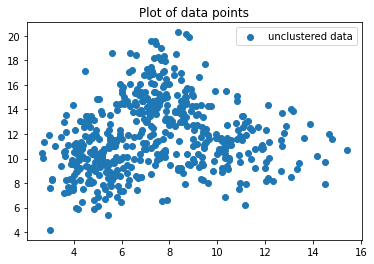

In [7]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],label='unclustered data')
plt.title('Plot of data points')
plt.legend()
plt.show()

**Predicted clustered datapoints**

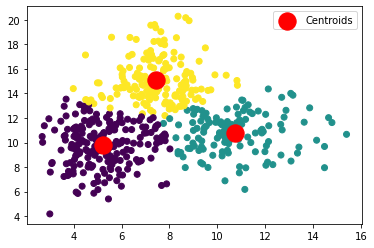

In [8]:
plt.scatter(kmeans.data.iloc[:,0],kmeans.data.iloc[:,1],c=kmeans.clusters)
plt.scatter(kmeans.centroids.iloc[:,0], kmeans.centroids.iloc[:,1], s=300,c='red',label='Centroids')
plt.legend()
plt.show()

In [9]:
def accuracy_score(y_actual, y_pred):
    correct = 0
    for actual, pred in zip(y_actual, y_pred):
        if actual == pred:
            correct += 1
            
    return round((correct / len(y_actual)) * 100, 2)

In [10]:
print("Accuracy Score :", accuracy_score(y.values, kmeans.clusters))

Accuracy Score : 88.4
